# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import shutil
from zipfile import ZipFile

## Import Dataset from Kaggle

Import over the Kaggle API, move files and clean up directory all in one. It is necessary because of the data limit of Github to have easy access to the data.

**paultimothymooney/blood-cells** is the kaggle-repo

In [3]:
# remove directories if they exist ./train/, labels.csv, blood-cells.zip, dataset2-master and dataset-master
if os.path.exists('./train'):
    shutil.rmtree('./train')
if os.path.exists('./labels.csv'):
      os.remove('./labels.csv')
if os.path.exists('./blood-cells.zip'):
      os.remove('./blood-cells.zip')
if os.path.exists('./dataset2-master'):
      shutil.rmtree('./dataset2-master')
if os.path.exists('./dataset-master'):
      shutil.rmtree('./dataset-master')



# download dataset from kaggle
os.system('kaggle datasets download -d paultimothymooney/blood-cells')

# extract dataset
with ZipFile('blood-cells.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()



# mv direcory  ./dataset2-master/images/TRAIN to ./train
os.rename('./dataset2-master/dataset2-master/images/TRAIN', './train')
# mv ./dataset-master/lables.csv to ./labels.csv
os.rename('./dataset-master/dataset-master/labels.csv', './labels.csv')

# rename sub directories in ./train to lowercase
dirs = os.listdir('./train/')
for d in dirs:
    os.rename('./train/' + d, './train/' + d.lower())

# remove the zip file and datasets
os.remove('blood-cells.zip')
shutil.rmtree('./dataset-master')
shutil.rmtree('./dataset2-master')


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/blood-cells
License(s): other


100%|██████████| 108M/108M [00:03<00:00, 34.8MB/s] 


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


(411, 2)


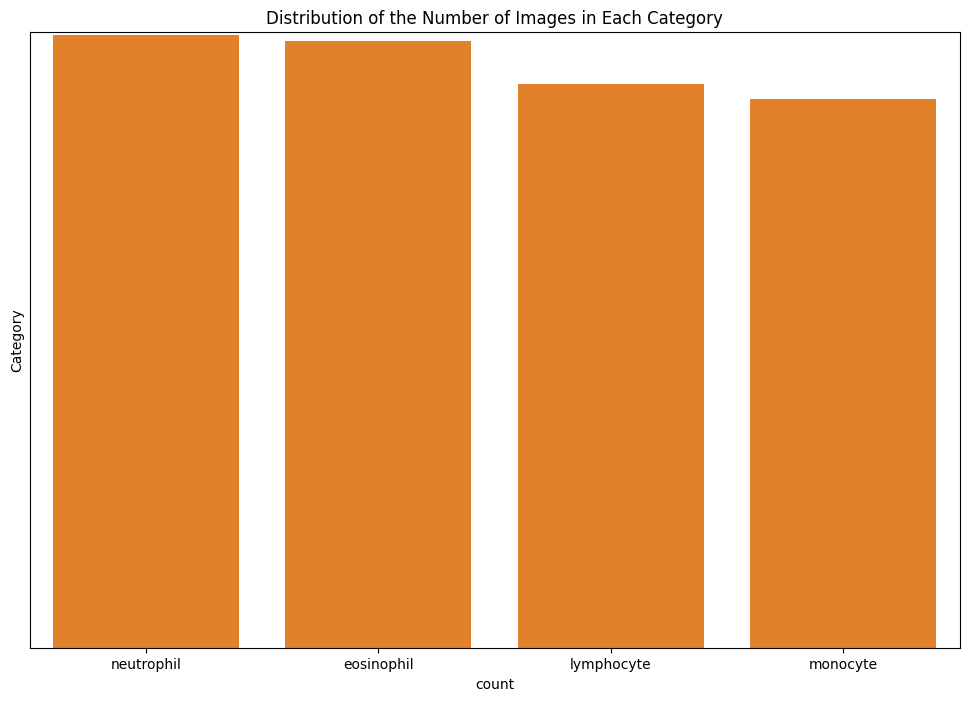

In [4]:
# clean up directory
if os.path.exists('distribution.png'):
    os.remove('distribution.png')
if os.path.exists('distribution_num.png'):
    os.remove('distribution_num.png')


# Load data
data = pd.read_csv('labels.csv')

# remove unnamed column
data = data.drop('Unnamed: 0', axis=1)

# display the shape of the data
print(data.shape)

# display the first few rows of the data and the structure of the data

# plot the distribution of 'Image' for 'Category'
plt.figure(figsize=(12, 8))
sns.countplot(data['Category'])
plt.title('Distribution of Categories')
# save the plot
plt.savefig('distribution.png')

# get the list of directories in ./train/
cells = {'neutrophil': 0, 'eosinophil': 0, 'lymphocyte': 0, 'monocyte': 0}
dirs = os.listdir('./train/')
for d in dirs:
    if d in cells.keys():
        cells[d] = len(os.listdir('./train/' + d))

# plot the distribution of the number of images in each category
sns.barplot(x=list(cells.keys()), y=list(cells.values()))
plt.ylim(2300, 2500)
plt.title('Distribution of the Number of Images in Each Category')
# save the plot
plt.savefig('distribution_num.png')


### The Dataset contains 400 original images with the distribution looking like this:
![Distributions of Categories](./distribution.png)

### The Dataset also has already prepared data which reduces the categories to 4 and already increased numbers with in place changes like rotations or flips
![Distribution of Images](./distribution_num.png)

## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


NameError: name 'df' is not defined

In [ ]:
# Handling missing values
# Example: Replacing NaN values with the mean value of the column
# df.fillna(df.mean(), inplace=True)

# Your code for handling missing values goes here


## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


In [ ]:
# Example: Plotting histograms of all numerical features
df.hist(figsize=(12, 12))
plt.show()


## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


In [ ]:
# Example: Checking for class imbalance in a classification problem
# sns.countplot(x='target_variable', data=df)

# Your code to investigate possible biases goes here


## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


In [ ]:
# Example: Plotting a heatmap to show feature correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
